In [1]:
from math import cos, hypot, sin, atan2, pi

eps = 1e-4

class Point:
    def __init__(self, *args):
        self.coords = list(args)
        self.x = args[0]
        self.y = args[1]
        self.angle = atan2(-self.y, -self.x)

    def __eq__(self, other):
        def comp(a, b):
            return abs(a-b) < eps

        if len(self.coords) != len (other.coords):
            return "Arithmetic Error"
        else:
            for i, coord in enumerate(self.coords):
                if comp(coord, other.coords[i]) == False:
                    return False
        return True

    def rotate(self, theta):
        theta = theta * pi / 180
        x = self.x
        y = self.y
        self.x = x * cos(theta) - y * sin(theta)
        self.y = x * sin(theta) + y * cos(theta)

    def distance(self, p2):
        dx = self.x - p2.coords[0]
        dy = self.y - p2.coords[1]
        return hypot(dx, dy)

    def __repr__(self):
        return f"({self.x:.2f}, {self.y:.2f})"

    def angleByPivot(self, p2):
        return atan2(self.y - p2.y, self.x - p2.x)

    def vector2(self, p2):
        return (p2.x-self.x, p2.y-self.y)

def isConvex(o, p, q):
    #z = (p[0] * q[1] - q[0] * p[1])
    z = (p.x-o.x)*(q.y-o.y) - (p.y-o.y)*(q.x-o.x)
    return z > 0


In [2]:
import matplotlib.pyplot as plt
from matplotlib import animation

def coloringConvexHull (points, history):
  fig = plt.figure()
  ax  = fig.add_subplot()
  
  x = [point.x for point in points]
  y = [point.y for point in points]
  
  def init():
    patches = ax.scatter(x,y, c="gray")
    return [patches]

  def animate(i):
    # global patches
    # patches.remove()
    patches = ax.clear()
    patches = ax.scatter(x,y, c="lightgray")
    
    xp = [point.x for point in history["psd"][i]]
    yp = [point.y for point in history["psd"][i]]
    xn = [point.x for point in history["ntPsd"][i]]
    yn = [point.y for point in history["ntPsd"][i]]
    xt = [point.x for point in history["tst"][i]]
    yt = [point.y for point in history["tst"][i]]

    patches = ax.plot(xp,yp,c="mediumturquoise")
    patches = ax.scatter(xp,yp,c="orange")

    patches = ax.scatter(xn,yn,c="red")
    
    patches = ax.plot(xt,yt,c="pink")
    patches = ax.scatter(xt,yt,c="mediumorchid")

    return [patches]

  

  return animation.FuncAnimation(fig, animate, init_func=init, frames=len(history["psd"]), blit=True)

In [4]:
# approved, not approved, testing
global history 
history = dict(psd = [], ntPsd= [], tst = [])

def updateHistory(passed, notPass, testing):
    history['psd'].append(passed)
    history['ntPsd'].append(notPass)
    history['tst'].append(testing)

def clearHistory():
    history['psd'].clear()
    history['ntPsd'].clear()
    history['tst'].clear()


In [5]:
from IPython.display import HTML
import copy
from random import randint, seed

seed(50771708)
originalPoints= [Point(randint(-100,100), randint(-100,100)) for i in range(30)]
#originalPoints = [Point(4,6), Point(7,3), Point(3,3), Point(5,5), Point(7,7), Point(4,4), Point(3,7)]
points = originalPoints.copy()

points.sort(key=lambda p: (p.x, p.y))
base_point = points.pop(0)
last_point = points.pop()
points.append(last_point)

points.sort(key=lambda p: (p.angleByPivot(base_point)))

stack   = []
notPass = []
testing = []
clearHistory()

stack.append(base_point)
updateHistory(copy.deepcopy(stack), copy.deepcopy(notPass),testing)

stack.append(points.pop(0))
stack.append(points.pop(0))

while len(points) > 0:
    if (points[0] == last_point):
        points.append(base_point)

    p = stack.pop()
    o = stack.pop()
    q = stack.pop()
    testing = [q, o, p]

    stack.append(q)
    updateHistory(copy.deepcopy(stack), copy.deepcopy(notPass),testing)
    
    testing = []
    if isConvex(o, p, q):
        stack.append(o)
        updateHistory(copy.deepcopy(stack), copy.deepcopy(notPass),testing)
        stack.append(p)
        stack.append(points.pop(0))
    else:
        notPass.append(o)
        stack.append(p)

updateHistory(copy.deepcopy(stack), copy.deepcopy(notPass),testing)


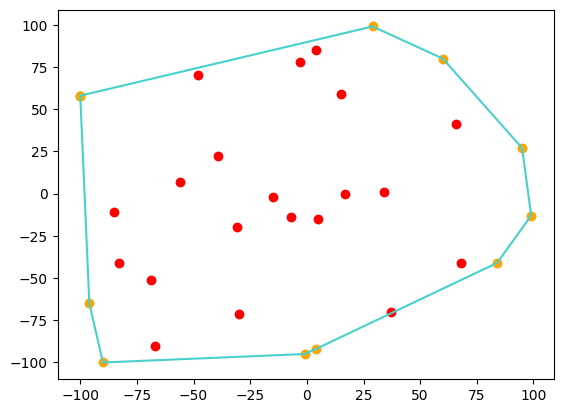

In [7]:
anim = coloringConvexHull(originalPoints, history)
HTML(anim.to_jshtml())